# Required Capstone Component 12.1

In [2]:
# Import any necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C, Matern
from scipy.stats import norm
from statistics import mean
import itertools
import math


# load initial inputs
x_1 = np.load("initial_data/function_1/initial_inputs.npy")
x_2 = np.load("initial_data/function_2/initial_inputs.npy")
x_3 = np.load("initial_data/function_3/initial_inputs.npy")
x_4 = np.load("initial_data/function_4/initial_inputs.npy")
x_5 = np.load("initial_data/function_5/initial_inputs.npy")
x_6 = np.load("initial_data/function_6/initial_inputs.npy")
x_7 = np.load("initial_data/function_7/initial_inputs.npy")
x_8 = np.load("initial_data/function_8/initial_inputs.npy")

# load initial outputs
y_1 = np.load("initial_data/function_1/initial_outputs.npy")
y_2 = np.load("initial_data/function_2/initial_outputs.npy")
y_3 = np.load("initial_data/function_3/initial_outputs.npy")
y_4 = np.load("initial_data/function_4/initial_outputs.npy")
y_5 = np.load("initial_data/function_5/initial_outputs.npy")
y_6 = np.load("initial_data/function_6/initial_outputs.npy")
y_7 = np.load("initial_data/function_7/initial_outputs.npy")
y_8 = np.load("initial_data/function_8/initial_outputs.npy")

## Function 1:

A function with a 2D input and 1D output. 

*Application: Detect likely contamination sources in a two-dimensional area, such as a radiation field, where only proximity yields a non-zero reading. The system uses Bayesian optimisation to tune detection parameters and reliably identify both strong and weak sources.*

I will use a Matern kernel because it is a generalisation of RBF and allows you to control for smoothness; and because the application is spatial, and the Matern kernel originated from spatial statistics. The Matern function has two parameters: length scale and $\nu$. Length scale is the correlation decay parameter, and $\nu$ controls the smoothness. 

The larger the length scale, the more correlated far away points are, while smaller values of length scales means the correlation between points decays faster with distance. 

$\nu = 1.5$ corresponds to once differentiable functions, and $\nu = 2.5$ corresponds to twice differentiable functions. As $\nu$ tends towards infinity, the kernel becomes equivalent to the RBF kernel. So, the smaller $\nu$, the less smooth the function.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.Matern.html

In [7]:
#look at the data
print(x_1)
print(y_1)

# look at average distance between points

# Get all unique combinations of length 2
pairs_1 = itertools.permutations(x_1[0], 2)
pairs_2 = itertools.permutations(x_1[1], 2)
# Calculate the absolute difference for each pair
differences_1 = [(p[0] - p[1])**2 for p in pairs_1]
differences_2 = [(p[0] - p[1])**2 for p in pairs_2]
# Calculate the average of the differences
average_difference_1 = sum(differences_1) / len(differences_1)
average_difference_2 = sum(differences_2) / len(differences_2)
print(average_difference_1)
print(average_difference_2)

[[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]
 [0.41043714 0.1475543 ]
 [0.31269116 0.07872278]
 [0.68341817 0.86105746]
 [0.08250725 0.40348751]
 [0.88388983 0.58225397]]
[ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048]
0.19674146865507672
0.09337234682583528


/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_12274/1215673032.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_to_plot,


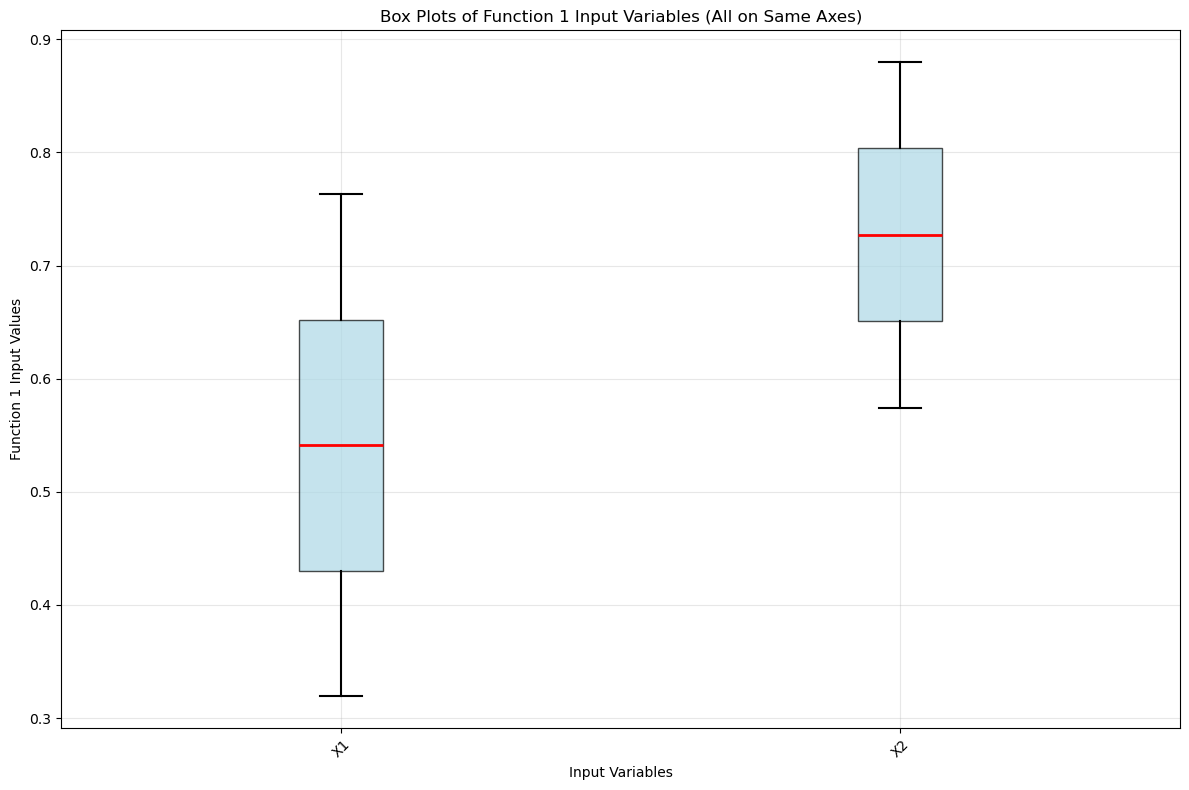

In [45]:
# Create a single plot with boxplots for all columns of x
plt.figure(figsize=(12, 8))

# Prepare data for boxplot - each column of x becomes a separate list
data_to_plot = [x_1[i] for i in range(2)]  

# Create boxplot with all columns on the same axes
box_plot = plt.boxplot(data_to_plot, 
                       labels=['X1', 'X2'],
                       patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(color='black', linewidth=1.5),
                       capprops=dict(color='black', linewidth=1.5),
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))

plt.ylabel('Function 1 Input Values')
plt.xlabel('Input Variables')
plt.title('Box Plots of Function 1 Input Variables (All on Same Axes)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

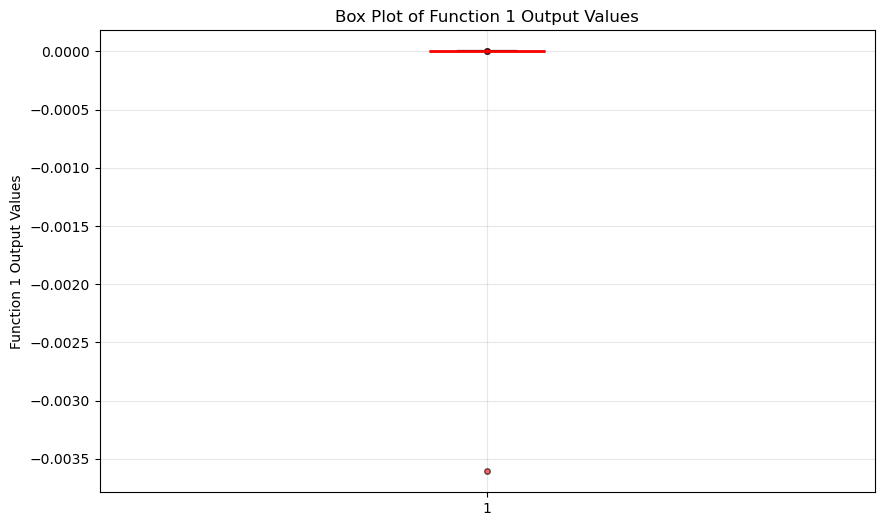

Function 1 Output Values Statistics:
Mean: -0.00036060626443627054
Std: 0.0010818187933090686
Min: -0.0036060626443634764
Max: 7.710875114502849e-16
Range: 0.0036060626443642474


In [10]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(y_1, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Function 1 Output Values')
plt.title('Box Plot of Function 1 Output Values')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Function 1 Output Values Statistics:")
print("Mean:", np.mean(y_1))
print("Std:", np.std(y_1))
print("Min:", np.min(y_1))
print("Max:", np.max(y_1))
print("Range:", np.max(y_1) - np.min(y_1))


The average square difference between in x[0] is around 0.2, and the average difference between points in x[1] is 0.10. The reason I chose square difference is because of the inverse square law (https://en.wikipedia.org/wiki/Inverse-square_law). Based off this information and the fact that radiation decays rapidly over space (CHECK), I chose fairly low length scale values. I also adjusted them until they were small enough so that the chosen query point was not at the edge of the domain (x[0] and x[1] taking values of either 0 or 1).

Once I settled on length scale, I attempted three different common values for $\nu$: 0.5, 1.5 and 2.5. 1.5 and 2.5 gave similar points, so I chose the most common choice, 1.5. 

$\kappa$, the parameter balancing exploitation and explorartion, was chosen by first looking at the average posterior mean estimates and the average posterior standard deviation estimates. The posterior means were very small compared to the posterior standard deviation, so $\kappa$ needs to be small as well so that the standard deviation did not over power the mean, thus prioritising exploration only. I chose $\kappa$ so that exploration and exploitation are balanced better, but exploration is still prioritised because there are likely to be a couple of localised peaks, relating to areas of high radiocativity, and everywhere else will have very low radioactivity. So I did not want to get stuck in a localised peak. 


In [16]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = [0.01, 0.01]
nu = 1.5

# set up evaluation grid:
x_11 = np.linspace(0, 1, 100)
x_12 = np.linspace(0, 1, 100)
x_11, x_12 = np.meshgrid(x_11, x_12)
x_1_grid = np.column_stack([x_11.ravel(), x_12.ravel()])

# Define and fit GP
kernel = Matern(length_scale = length_scale, nu = nu)
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption)
model.fit(np.array(x_1), np.array(y_1))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_1_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))

# Calculate the UCB aquisition function
kappa =  1e-4 # choose this by looking at the mean post_mean and post_std to get an idea of the scale of each
UCB = post_mean + kappa * post_std

# Get the next query point
max_idx_1 = np.argmax(UCB)  
next_point_1 = x_1_grid[max_idx_1] 
print("Best known point:", x_1[np.argmax(y_1)])
print("Next query point:", round(next_point_1[0], 6), round(next_point_1[1], 6))


average posterior mean: -2.2121887823192958e-06
average posterior standard deviation: 0.9986634095662825
Best known point: [0.73102363 0.73299988]
Next query point: 0.79798 0.767677


Plotting the posterior mean below, the plot is very similar to the plot y_1 seen above. This is to be expected, since the Gaussian Process is being used to approximate function 1. This plot can help check that my parameter choices for the GP and kernel were appropriate. 

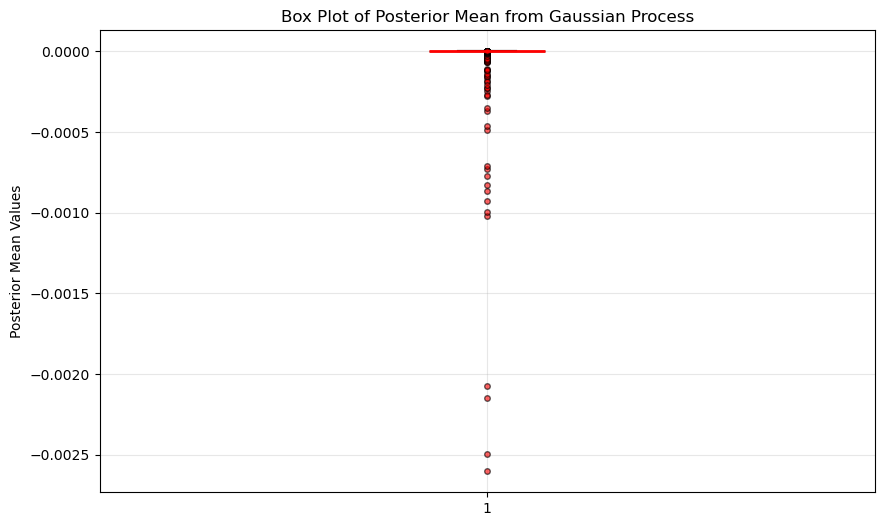

Posterior Mean Statistics:
Mean: -2.2121887823192954e-06
Std: 5.399545691755277e-05
Min: -0.002601866834342887
Max: 1.2862159230489401e-09
Range: 0.00260186812055881


In [17]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))


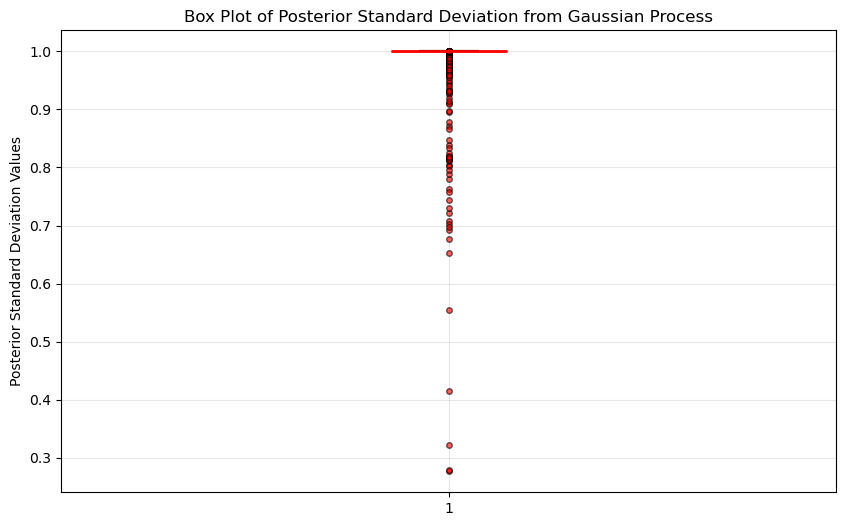

Posterior Standard Deviation Statistics:
Mean: 0.9986634095662826
Std: 0.01930846297001481
Min: 0.27678952475070967
Max: 1.0
Range: 0.7232104752492903


In [18]:
# Create density plot of post_std
plt.figure(figsize=(10, 6))
plt.boxplot(post_std, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Standard Deviation Values')
plt.title('Box Plot of Posterior Standard Deviation from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Standard Deviation Statistics:")
print("Mean:", np.mean(post_std))
print("Std:", np.std(post_std))
print("Min:", np.min(post_std))
print("Max:", np.max(post_std))
print("Range:", np.max(post_std) - np.min(post_std))


## Function 2:

A function with a 2D input and 1D output. 

*Application: Imagine a black box, or a mystery ML model, that takes two numbers as input and returns a log-likelihood score. Your goal is to maximise that score, but each output is noisy, and depending on where you start, you might get stuck in a local optimum.* 

*To tackle this, you use Bayesian optimisation, which selects the next inputs based on what it has learned so far. It balances exploration with exploitation, making it well suited to noisy outputs and complex functions with many local peaks.*



In [19]:
#look at the data
print(x_2)
print(y_2)

# look at average distance between points

# Get all unique combinations of length 2
pairs_1 = itertools.permutations(x_2[0], 2)
pairs_2 = itertools.permutations(x_2[1], 2)
# Calculate the absolute difference for each pair
differences_1 = [(p[0] - p[1])**2 for p in pairs_1]
differences_2 = [(p[0] - p[1])**2 for p in pairs_2]
# Calculate the average of the differences
average_difference_1 = sum(differences_1) / len(differences_1)
average_difference_2 = sum(differences_2) / len(differences_2)
print(average_difference_1)
print(average_difference_2)

[[0.66579958 0.12396913]
 [0.87779099 0.7786275 ]
 [0.14269907 0.34900513]
 [0.84527543 0.71112027]
 [0.45464714 0.29045518]
 [0.57771284 0.77197318]
 [0.43816606 0.68501826]
 [0.34174959 0.02869772]
 [0.33864816 0.21386725]
 [0.70263656 0.9265642 ]]
[ 0.53899612  0.42058624 -0.06562362  0.29399291  0.21496451  0.02310555
  0.24461934  0.03874902 -0.01385762  0.61120522]
0.29358023908059555
0.009833397381678828


/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_12274/955304517.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_to_plot,


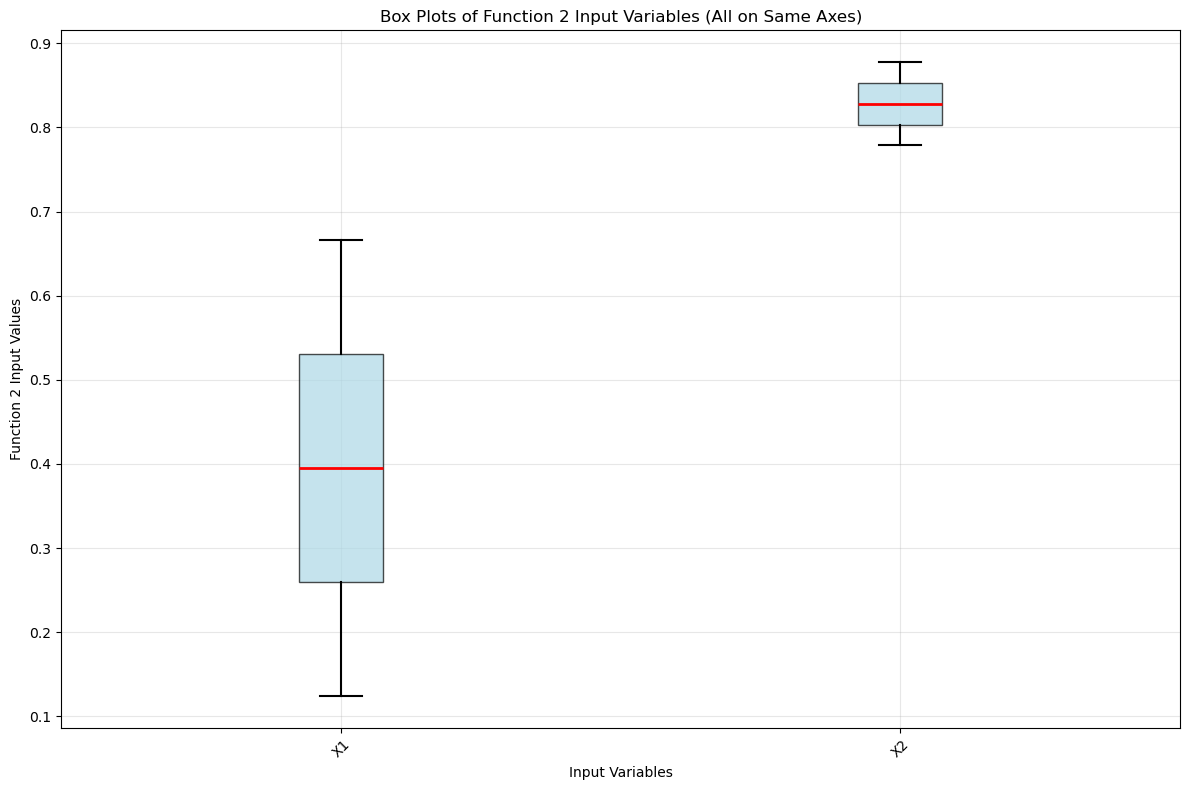

In [46]:
# Create a single plot with boxplots for all columns of x
plt.figure(figsize=(12, 8))

# Prepare data for boxplot - each column of x becomes a separate list
data_to_plot = [x_2[i] for i in range(2)]  

# Create boxplot with all columns on the same axes
box_plot = plt.boxplot(data_to_plot, 
                       labels=['X1', 'X2'],
                       patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(color='black', linewidth=1.5),
                       capprops=dict(color='black', linewidth=1.5),
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))

plt.ylabel('Function 2 Input Values')
plt.xlabel('Input Variables')
plt.title('Box Plots of Function 2 Input Variables (All on Same Axes)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

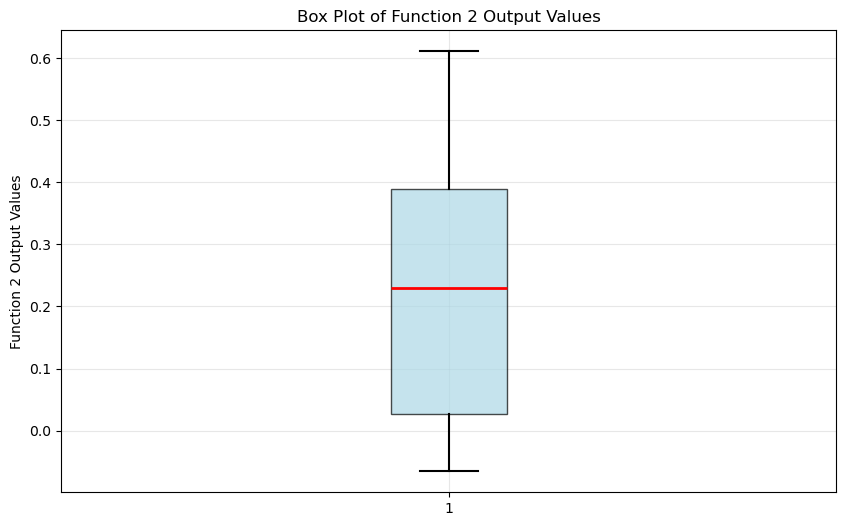

Function 2 Output Values Statistics:
Mean: 0.23067376631994235
Std: 0.22536450367310826
Min: -0.06562362443733738
Max: 0.6112052157614438
Range: 0.6768288401987812


In [22]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(y_2, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Function 2 Output Values')
plt.title('Box Plot of Function 2 Output Values')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Function 2 Output Values Statistics:")
print("Mean:", np.mean(y_2))
print("Std:", np.std(y_2))
print("Min:", np.min(y_2))
print("Max:", np.max(y_2))
print("Range:", np.max(y_2) - np.min(y_2))

I expect a fair amount of noise based on the application notes. Since the range of the output is around 0.7, I chose a noise assumption near this amount, but smaller. 

Since the output is of a log-likelihood function, it is likely to be fairly smooth. Because of this, I will use a RBF kernel. 

I chose my length scale parameter of the values seen in the average squared distance and I adjusted them until the plot of the posterior means looked similar to the plot of the output. Smaller values of length scale resulted in the plot of the posterior means becoming very skew towards zero. 

Since the posterior mean and posterior standard deviations were on similar scales, and I wanted to balance both exploitation and exploration, I chose $\kappa = 1$. 

In [64]:
# GP assumption
noise_assumption = 1e-3

# kernel parameters
length_scale = 0.1

# set up evaluation grid:
x_21 = np.linspace(0, 1, 100)
x_22 = np.linspace(0, 1, 100)
x_21, x_22 = np.meshgrid(x_21, x_22)
x_2_grid = np.column_stack([x_21.ravel(), x_22.ravel()])

# Define and fit GP
kernel = RBF(length_scale = length_scale) 
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption)
model.fit(np.array(x_2), np.array(y_2))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_2_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))

# Calculate the UCB aquisition function
kappa =  1 # choose this by looking at the mean post_mean and post_std to get an idea of the scale of each
UCB = post_mean + kappa * post_std

# Get the next query point
max_idx_2 = np.argmax(UCB)  
next_point_2 = x_2_grid[max_idx_2] 
print("Best known point:", x_2[np.argmax(y_2)])
print("Next query point:", round(next_point_2[0], 6), round(next_point_2[1], 6))

average posterior mean: 0.3294624743243678
average posterior standard deviation: 0.2840358170314473
Best known point: [0.70263656 0.9265642 ]
Next query point: 0.060606 0.848485


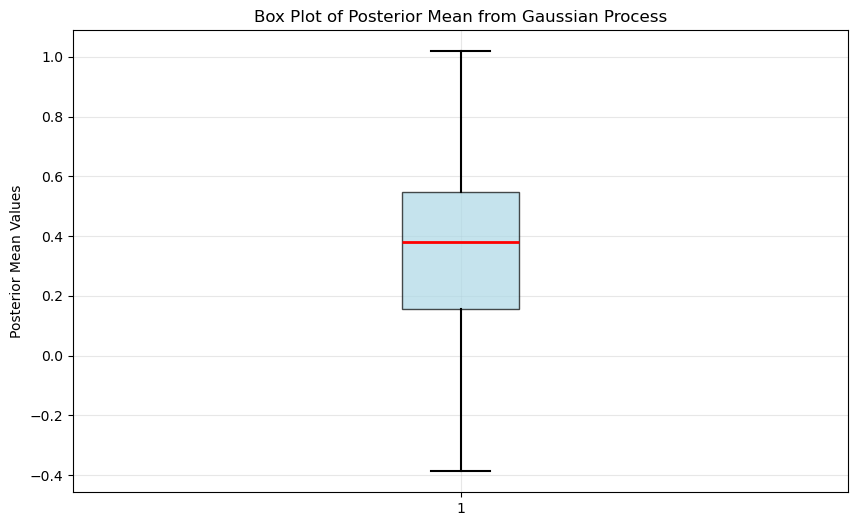

Posterior Mean Statistics:
Mean: 0.3294624745405372
Std: 0.28076700252344855
Min: -0.3871960669569488
Max: 1.018509354312063
Range: 1.4057054212690117


In [62]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))


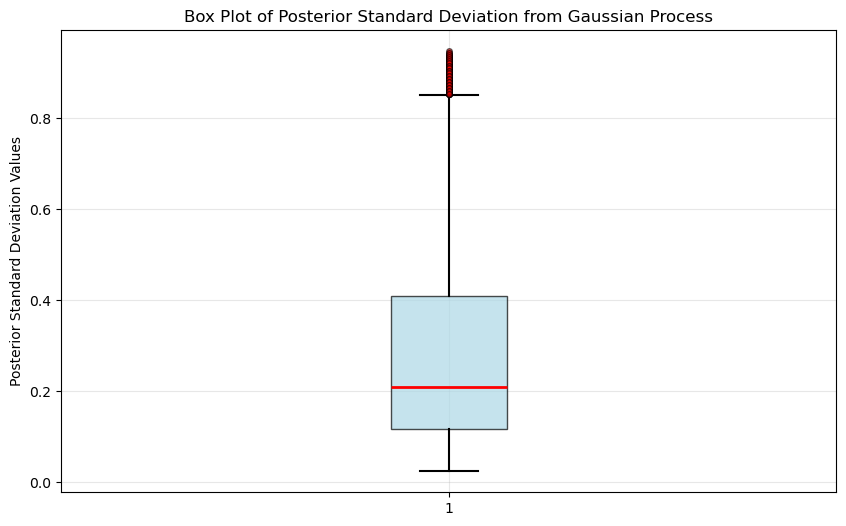

Posterior Standard Deviation Statistics:
Mean: 0.28403581703144726
Std: 0.21419582800497955
Min: 0.02435011297675063
Max: 0.9477329784066992
Range: 0.9233828654299486


In [65]:
# Create density plot of post_std
plt.figure(figsize=(10, 6))
plt.boxplot(post_std, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Standard Deviation Values')
plt.title('Box Plot of Posterior Standard Deviation from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Standard Deviation Statistics:")
print("Mean:", np.mean(post_std))
print("Std:", np.std(post_std))
print("Min:", np.min(post_std))
print("Max:", np.max(post_std))
print("Range:", np.max(post_std) - np.min(post_std))


## Function 3:

A function with a 3D input and 1D output. 

*Application: You’re working on a drug discovery project, testing combinations of three compounds to create a new medicine.*

*Each experiment is stored in initial_inputs.npy as a 3D array, where each row lists the amounts of the three compounds used. After each experiment, you record the number of adverse reactions, stored in initial_outputs.npy as a 1D array.*

*Your goal is to minimise side effects; in this competition, it is framed as maximisation by optimising a transformed output (e.g. the negative of side effects).*

In [67]:
#look at the data
print(x_3)
print(y_3)

# look at average distance between points

# Get all unique combinations of length 2
pairs_1 = itertools.permutations(x_3[0], 2)
pairs_2 = itertools.permutations(x_3[1], 2)
pairs_3 = itertools.permutations(x_3[2], 2)
# Calculate the absolute difference for each pair
differences_1 = [(p[0] - p[1])**2 for p in pairs_1]
differences_2 = [(p[0] - p[1])**2 for p in pairs_2]
differences_3 = [(p[0] - p[1])**2 for p in pairs_3]
# Calculate the average of the differences
average_difference_1 = sum(differences_1) / len(differences_1)
average_difference_2 = sum(differences_2) / len(differences_2)
average_difference_3 = sum(differences_3) / len(differences_3)
print(average_difference_1)
print(average_difference_2)
print(average_difference_3)


[[0.17152521 0.34391687 0.2487372 ]
 [0.24211446 0.64407427 0.27243281]
 [0.53490572 0.39850092 0.17338873]
 [0.49258141 0.61159319 0.34017639]
 [0.13462167 0.21991724 0.45820622]
 [0.34552327 0.94135983 0.26936348]
 [0.15183663 0.43999062 0.99088187]
 [0.64550284 0.39714294 0.91977134]
 [0.74691195 0.28419631 0.22629985]
 [0.17047699 0.6970324  0.14916943]
 [0.22054934 0.29782524 0.34355534]
 [0.66601366 0.67198515 0.2462953 ]
 [0.04680895 0.23136024 0.77061759]
 [0.60009728 0.72513573 0.06608864]
 [0.96599485 0.86111969 0.56682913]]
[-0.1121222  -0.08796286 -0.11141465 -0.03483531 -0.04800758 -0.11062091
 -0.39892551 -0.11386851 -0.13146061 -0.09418956 -0.04694741 -0.10596504
 -0.11804826 -0.03637783 -0.05675837]
0.014913249028270006
0.10020275522269295
0.0666587674158688


/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_12274/2036452201.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_to_plot,


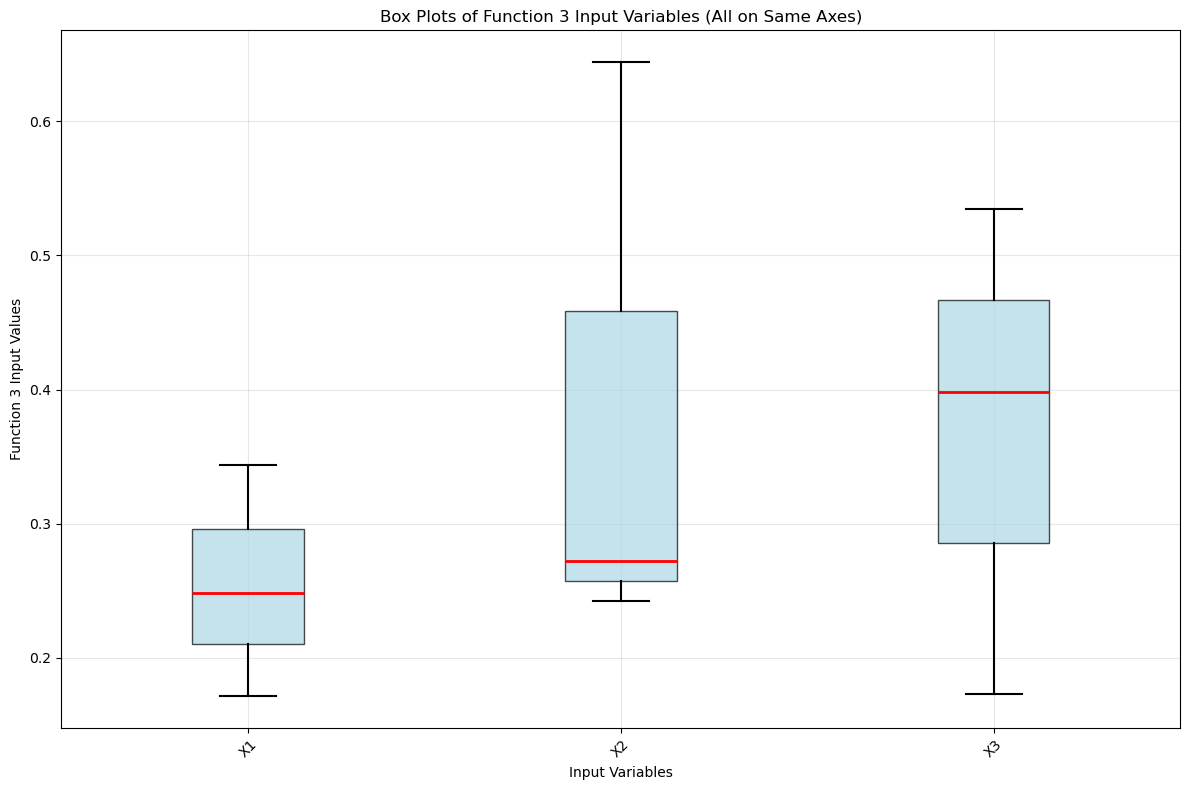

In [47]:
# Create a single plot with boxplots for all columns of x
plt.figure(figsize=(12, 8))

# Prepare data for boxplot - each column of x becomes a separate list
data_to_plot = [x_3[i] for i in range(3)]  

# Create boxplot with all columns on the same axes
box_plot = plt.boxplot(data_to_plot, 
                       labels=['X1', 'X2', 'X3'],
                       patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(color='black', linewidth=1.5),
                       capprops=dict(color='black', linewidth=1.5),
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))

plt.ylabel('Function 3 Input Values')
plt.xlabel('Input Variables')
plt.title('Box Plots of Function 3 Input Variables (All on Same Axes)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

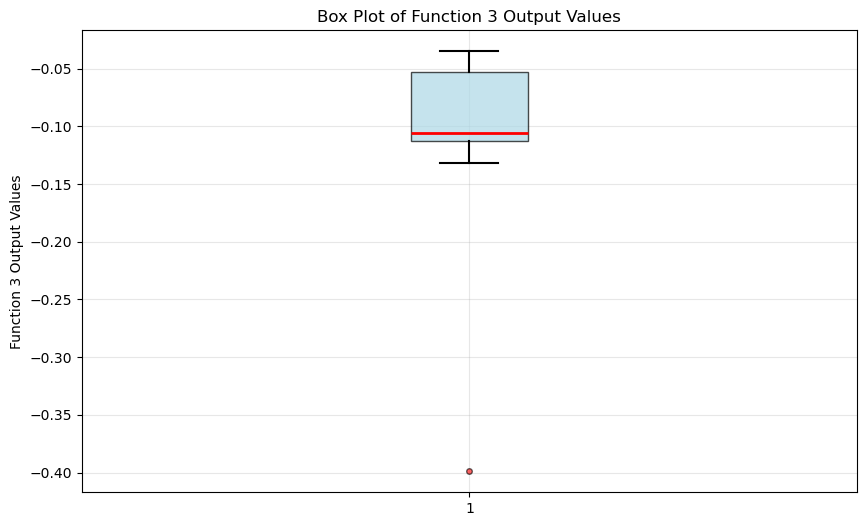

Function 3 Output Values Statistics:
Mean: -0.10716697472812112
Std: 0.08421399358525467
Min: -0.3989255131463011
Max: -0.034835313350078584
Range: 0.3640901997962225


In [71]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(y_3, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Function 3 Output Values')
plt.title('Box Plot of Function 3 Output Values')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Function 3 Output Values Statistics:")
print("Mean:", np.mean(y_3))
print("Std:", np.std(y_3))
print("Min:", np.min(y_3))
print("Max:", np.max(y_3))
print("Range:", np.max(y_3) - np.min(y_3))


Since these are likely stem from self-reported scores, I would think that the function is unlikely to be smooth, so I used the Matern kernel again. I would also expect a lot of inaccuraties and subjectivity in the scores, and so a lot of noise. Because of this, I decided to a white kernel which helps account for noisy data. 

I adjusted the noise parameters until the distribution of the posterior means was simialr to that of the output. 

I was struggling wth only getting query points close to the boundry. Even reducing the grid ranges to be closer to the ranges seen in the data did not help. So I decided to use the PI acquisition function with a very small eta instead which yeilded better results. I tried EI as well but that also got stuck on the boundaries. 

In [ ]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = 0.1
nu = 2.5
noise_assumption = 1e-10

# set up evaluation grid:
x_31 = np.linspace(0, 1, 100)
x_32 = np.linspace(0, 1, 100)
x_33 = np.linspace(0, 1, 100)
x_31, x_32, x_33 = np.meshgrid(x_31, x_32, x_33)
x_3_grid = np.column_stack([x_31.ravel(), x_32.ravel(), x_33.ravel()])

# Define and fit GP
#kernel = RBF(length_scale = length_scale) 
kernel = Matern(length_scale=length_scale, nu=2.5) + WhiteKernel(noise_level=noise_assumption)
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption) 
model.fit(np.array(x_3), np.array(y_3))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_3_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))

# Calculate the PI aquisition function
eta = 0.01 # encourages improvement by at least eta
y_max = float(np.max(y_3))
z = (post_mean - y_max - eta) / (post_std + 1e-12)
PI = norm.cdf(z)

# Get the next query point
max_idx_3 = np.argmax(PI)  
next_point_3 = x_3_grid[max_idx_3] 
print("Best known point:", x_3[np.argmax(y_3)])
print("Next query point:", round(next_point_3[0], 6), round(next_point_3[1], 6), round(next_point_3[2], 6))


average posterior mean: -0.12438450652668079
average posterior standard deviation: 0.06898533218727114
Best known point: [0.49258141 0.61159319 0.34017639]
Next query point: 0.171717 0.0 0.545455


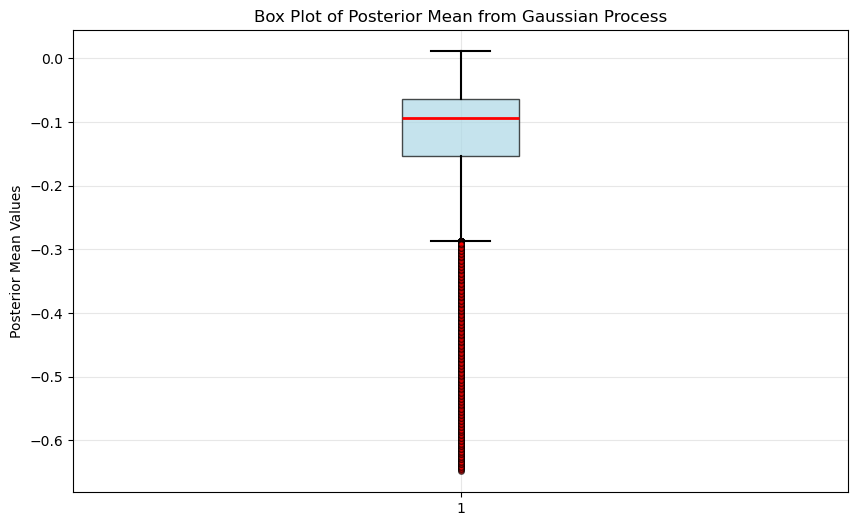

Posterior Mean Statistics:
Mean: -0.12438450652668079
Std: 0.09708400975028242
Min: -0.6485837379799136
Max: 0.01111767297899752
Range: 0.6597014109589112


In [113]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))


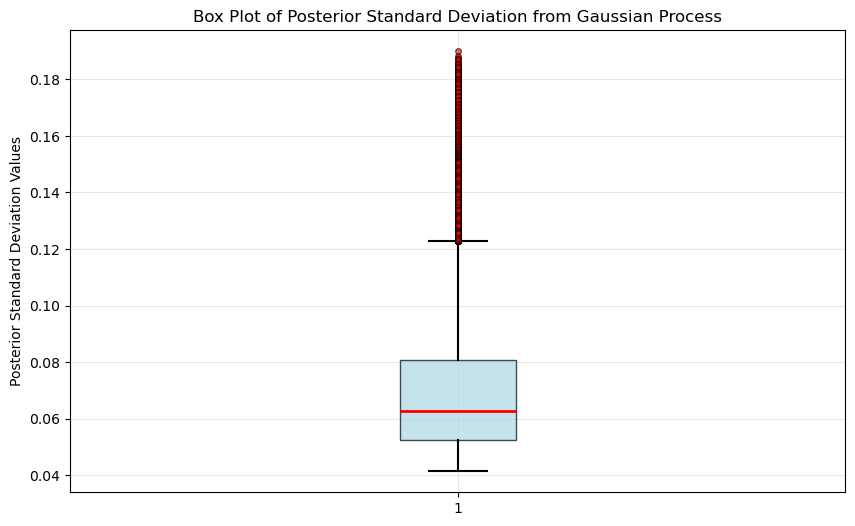

Posterior Standard Deviation Statistics:
Mean: 0.06898533218727114
Std: 0.022004530220902766
Min: 0.04135214237342458
Max: 0.18996268242381176
Range: 0.14861054005038718


In [114]:
# Create density plot of post_std
plt.figure(figsize=(10, 6))
plt.boxplot(post_std, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Standard Deviation Values')
plt.title('Box Plot of Posterior Standard Deviation from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Standard Deviation Statistics:")
print("Mean:", np.mean(post_std))
print("Std:", np.std(post_std))
print("Min:", np.min(post_std))
print("Max:", np.max(post_std))
print("Range:", np.max(post_std) - np.min(post_std))


## Function 4:

A function with a 4D input and a 1D output.

*Application: Address the challenge of optimally placing products across warehouses for a business with high online sales, where accurate calculations are costly and only feasible biweekly. To speed up decision-making, an ML model approximates these results within hours. The model has four hyperparameters to tune, and its output reflects the difference from the expensive baseline. Because the system is dynamic and full of local optima, it requires careful tuning and robust validation to find reliable, near-optimal solutions.*

In [3]:

# look at average distance between points

# Get all unique combinations of length 2
pairs_1 = itertools.permutations(x_4[0], 2)
pairs_2 = itertools.permutations(x_4[1], 2)
pairs_3 = itertools.permutations(x_4[2], 2)
pairs_4 = itertools.permutations(x_4[3], 2)
# Calculate the absolute difference for each pair
differences_1 = [(p[0] - p[1])**2 for p in pairs_1]
differences_2 = [(p[0] - p[1])**2 for p in pairs_2]
differences_3 = [(p[0] - p[1])**2 for p in pairs_3]
differences_4 = [(p[0] - p[1])**2 for p in pairs_4]
# Calculate the average of the differences
average_difference_1 = sum(differences_1) / len(differences_1)
average_difference_2 = sum(differences_2) / len(differences_2)
average_difference_3 = sum(differences_3) / len(differences_3)
average_difference_4 = sum(differences_4) / len(differences_4)
print(average_difference_1)
print(average_difference_2)
print(average_difference_3)
print(average_difference_4)



0.19474531515496704
0.07031751267908419
0.0775458197553703
0.21947825619933115


/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_12274/1038544973.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_to_plot,


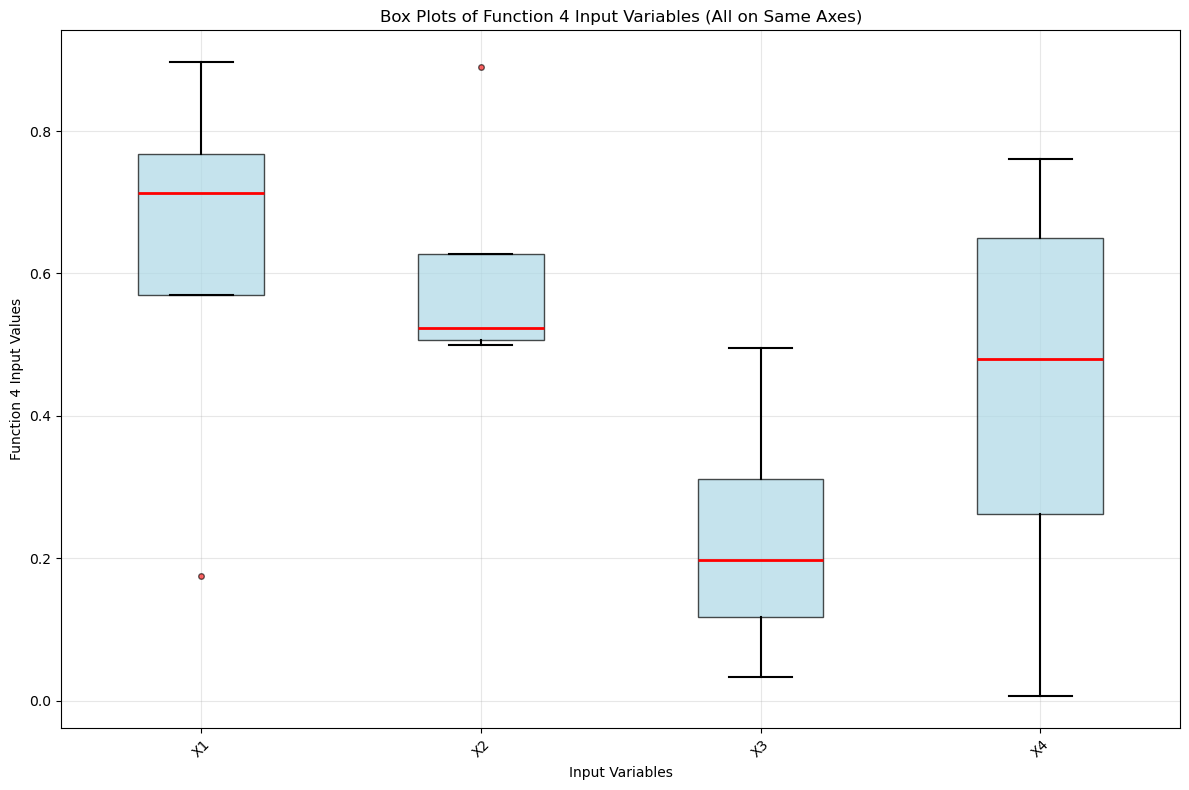

In [48]:
# Create a single plot with boxplots for all columns of x
plt.figure(figsize=(12, 8))

# Prepare data for boxplot - each column of x becomes a separate list
data_to_plot = [x_4[i] for i in range(4)]  

# Create boxplot with all columns on the same axes
box_plot = plt.boxplot(data_to_plot, 
                       labels=['X1', 'X2', 'X3', 'X4'],
                       patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(color='black', linewidth=1.5),
                       capprops=dict(color='black', linewidth=1.5),
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))

plt.ylabel('Function 4 Input Values')
plt.xlabel('Input Variables')
plt.title('Box Plots of Function 4 Input Variables (All on Same Axes)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

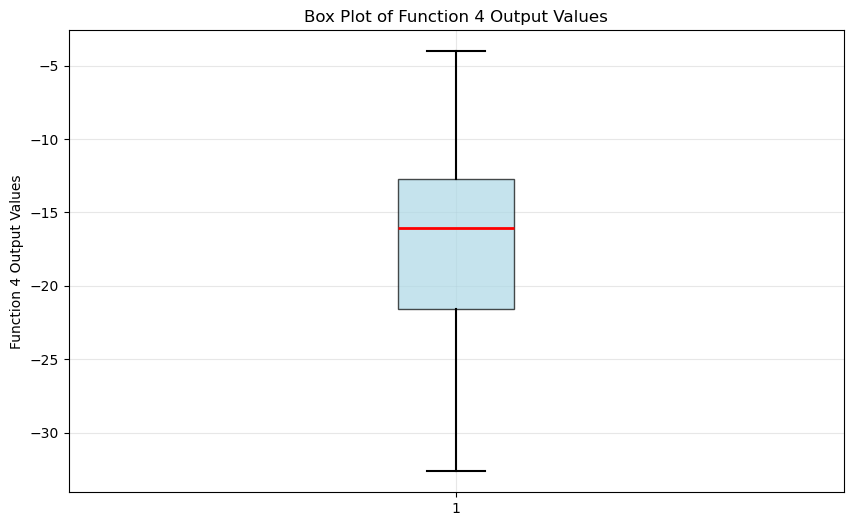

Function 4 Output Values Statistics:
Mean: -17.23858735128667
Std: 7.01798521152638
Min: -32.625660215962455
Max: -4.025542281908162
Range: 28.600117934054293


In [5]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(y_4, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Function 4 Output Values')
plt.title('Box Plot of Function 4 Output Values')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Function 4 Output Values Statistics:")
print("Mean:", np.mean(y_4))
print("Std:", np.std(y_4))
print("Min:", np.min(y_4))
print("Max:", np.max(y_4))
print("Range:", np.max(y_4) - np.min(y_4))

I chose a matern kernel because that gave the best looking posterior means. The RBF resulted in a very skew posterior mean distribution, suggesting that the chosen kernel was too smooth. 

I tried both the PI and UCB acquisition functions, and settled on the UCB because it was slightly easier to adjust so that exploration and exploitation were well balanced, the query point not tending too close to the best known point or the domain boundaries. 

In [ ]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = 0.1
nu = 2.5

# set up evaluation grid:
x_41 = np.linspace(0, 1, 50)
x_42 = np.linspace(0, 1, 50)
x_43 = np.linspace(0, 1, 50)
x_44 = np.linspace(0, 1, 50)
x_41, x_42, x_43, x_44 = np.meshgrid(x_41, x_42, x_43, x_44)
x_4_grid = np.column_stack([x_41.ravel(), x_42.ravel(), x_43.ravel(), x_44.ravel()])

# Define and fit GP
kernel = Matern(length_scale=length_scale, nu=2.5)
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption) 
model.fit(np.array(x_4), np.array(y_4))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_4_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))

# Calculate the PI aquisition function
eta = 0.1 # encourages improvement by at least eta
y_max = float(np.max(y_4))
z = (post_mean - y_max - eta) / (post_std + 1e-12)
PI = norm.cdf(z)
# Calculate the UCB aquisition function
kappa = 3 # choose this by looking at the mean post_mean and post_std to get an idea of the scale of each
UCB = post_mean + kappa * post_std


# Get the next query point
max_idx_4 = np.argmax(UCB)  
next_point_4 = x_4_grid[max_idx_4] 
print("Best known point:", x_4[np.argmax(y_4)])
print("Next query point:", round(next_point_4[0], 6), round(next_point_4[1], 6), round(next_point_4[2], 6), round(next_point_4[3], 6))


average posterior mean: -15.272234324906865
average posterior standard deviation: 0.5063688351487201
Best known point: [0.57776561 0.42877174 0.42582587 0.24900741]
Next query point: 0.55102 0.44898 0.408163 0.285714


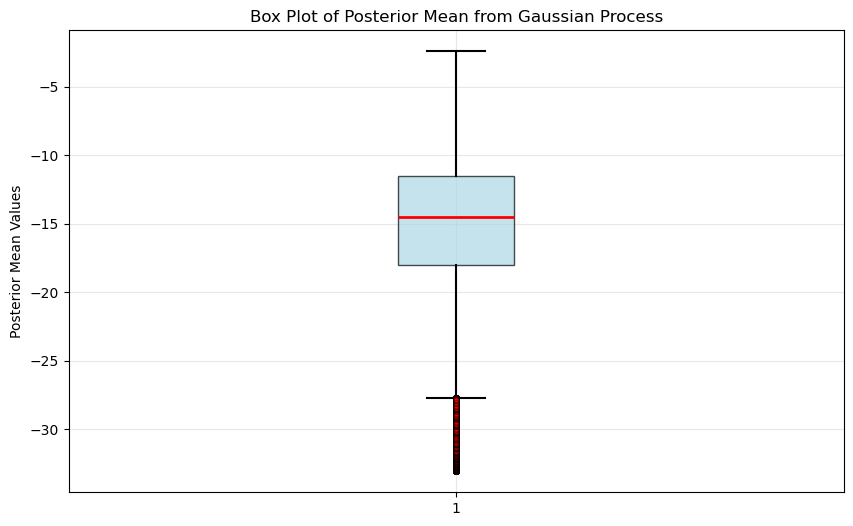

Posterior Mean Statistics:
Mean: -15.272234324906867
Std: 5.181061008731073
Min: -33.05943121720676
Max: -2.422634998990265
Range: 30.636796218216492


In [15]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))

## Function 5:

A function with a 4D input and a 1D output.

*Application: You’re tasked with optimising a four-variable black-box function that represents the yield of a chemical process in a factory. The function is typically unimodal, with a single peak where yield is maximised.*

*Your goal is to find the optimal combination of chemical inputs that delivers the highest possible yield, using systematic exploration and optimisation methods.*

In [21]:
# look at average distance between points

# Get all unique combinations of length 2
pairs_1 = itertools.permutations(x_5[0], 2)
pairs_2 = itertools.permutations(x_5[1], 2)
pairs_3 = itertools.permutations(x_5[2], 2)
pairs_4 = itertools.permutations(x_5[3], 2)
# Calculate the absolute difference for each pair
differences_1 = [(p[0] - p[1])**2 for p in pairs_1]
differences_2 = [(p[0] - p[1])**2 for p in pairs_2]
differences_3 = [(p[0] - p[1])**2 for p in pairs_3]
differences_4 = [(p[0] - p[1])**2 for p in pairs_4]
# Calculate the average of the differences
average_difference_1 = sum(differences_1) / len(differences_1)
average_difference_2 = sum(differences_2) / len(differences_2)
average_difference_3 = sum(differences_3) / len(differences_3)
average_difference_4 = sum(differences_4) / len(differences_4)
print(average_difference_1)
print(average_difference_2)
print(average_difference_3)
print(average_difference_4)


0.12486329780078098
0.05854364388509966
0.17521197636538266
0.0663220174435307


/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_12274/4036408551.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_to_plot,


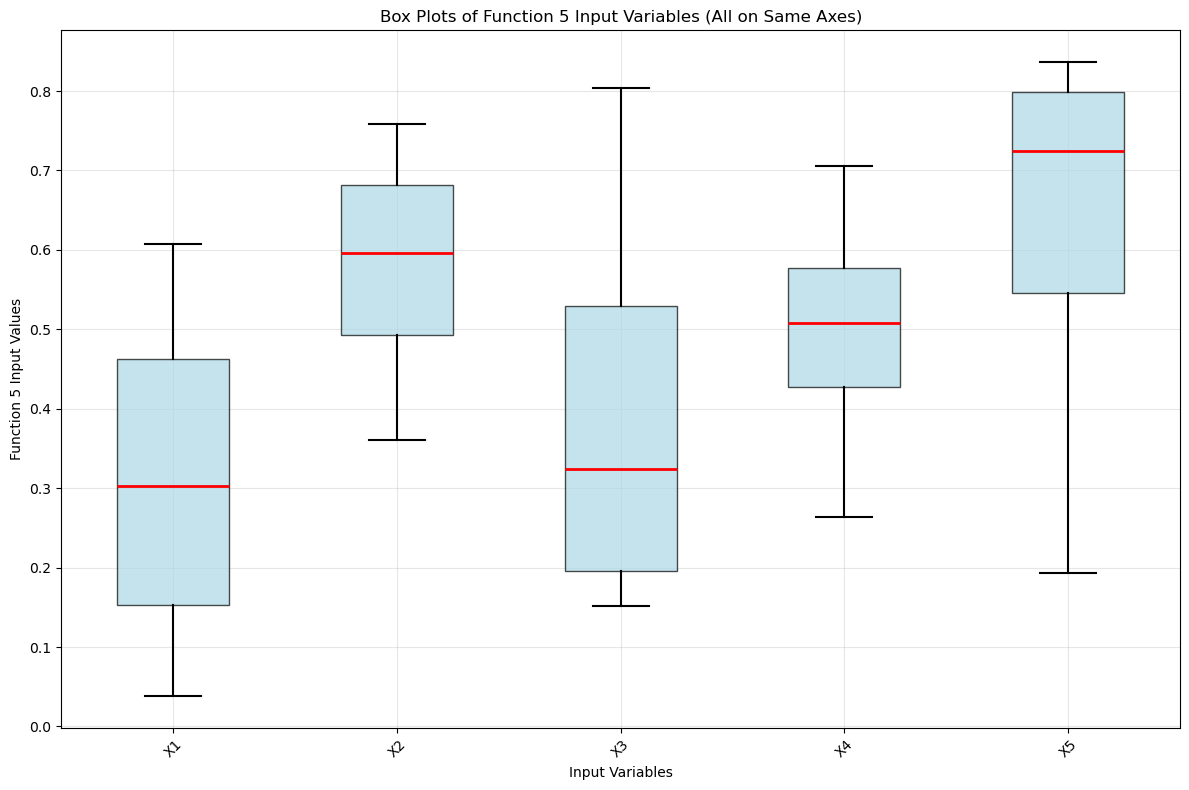

In [49]:
# Create a single plot with boxplots for all columns of x
plt.figure(figsize=(12, 8))

# Prepare data for boxplot - each column of x becomes a separate list
data_to_plot = [x_5[i] for i in range(5)]  

# Create boxplot with all columns on the same axes
box_plot = plt.boxplot(data_to_plot, 
                       labels=['X1', 'X2', 'X3', 'X4', 'X5'],
                       patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(color='black', linewidth=1.5),
                       capprops=dict(color='black', linewidth=1.5),
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))

plt.ylabel('Function 5 Input Values')
plt.xlabel('Input Variables')
plt.title('Box Plots of Function 5 Input Variables (All on Same Axes)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

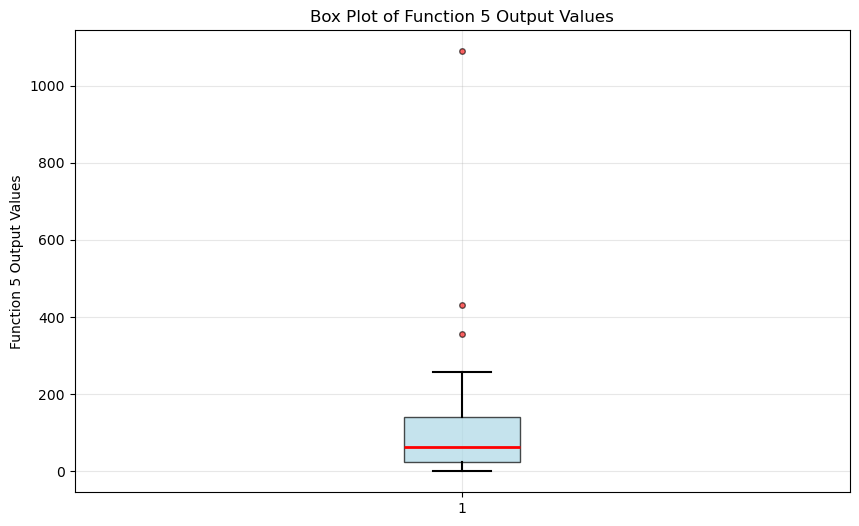

Function 5 Output Values Statistics:
Mean: 151.27187567901282
Std: 245.57598070645597
Min: 0.1129397953712203
Max: 1088.8596181962705
Range: 1088.7466784008993


In [23]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(y_5, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Function 5 Output Values')
plt.title('Box Plot of Function 5 Output Values')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Function 5 Output Values Statistics:")
print("Mean:", np.mean(y_5))
print("Std:", np.std(y_5))
print("Min:", np.min(y_5))
print("Max:", np.max(y_5))
print("Range:", np.max(y_5) - np.min(y_5))



Since the function is unimodal, I will first try a smooth kernel, RBF. I will also prioritise exploitation over exploration in my Acquisition function, since there is no risk of getting stuck in a local optimum. I will still include some level of exploration. 

In [31]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = 0.1

# set up evaluation grid:
x_51 = np.linspace(0, 1, 50)
x_52 = np.linspace(0, 1, 50)
x_53 = np.linspace(0, 1, 50)
x_54 = np.linspace(0, 1, 50)
x_51, x_52, x_53, x_54 = np.meshgrid(x_51, x_52, x_53, x_54)
x_5_grid = np.column_stack([x_51.ravel(), x_52.ravel(), x_53.ravel(), x_54.ravel()])

# Define and fit GP
kernel = RBF(length_scale = length_scale) 
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption) 
model.fit(np.array(x_5), np.array(y_5))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_5_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))

# Calculate the UCB aquisition function
kappa = 0.1 
UCB = post_mean + kappa * post_std


# Get the next query point
max_idx_5 = np.argmax(UCB)  
next_point_5 = x_5_grid[max_idx_5] 
print("Best known point:", x_5[np.argmax(y_5)])
print("Next query point:", round(next_point_5[0], 6), round(next_point_5[1], 6), round(next_point_5[2], 6), round(next_point_5[3], 6))


average posterior mean: 44.8224593037853
average posterior standard deviation: 0.91466331302551
Best known point: [0.22418902 0.84648049 0.87948418 0.87851568]
Next query point: 0.22449 0.836735 0.877551 0.877551


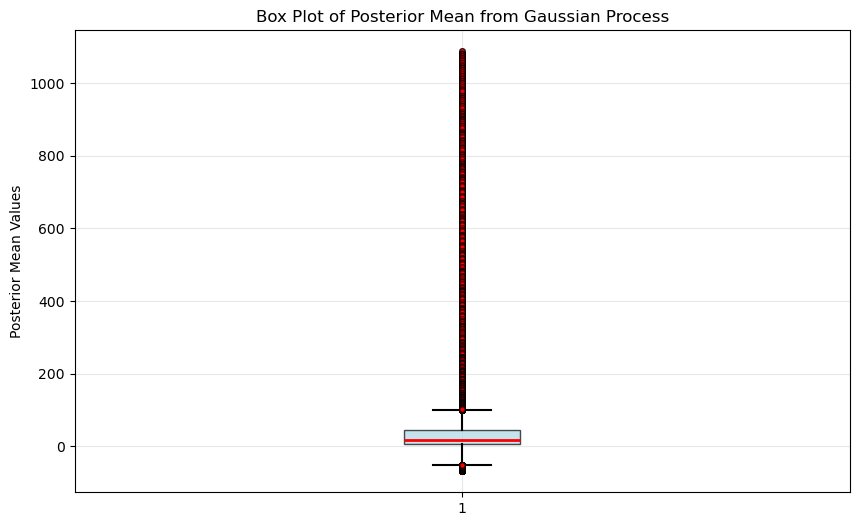

Posterior Mean Statistics:
Mean: 44.822459303785294
Std: 92.24273317735184
Min: -68.86310403226499
Max: 1087.5140825949836
Range: 1156.3771866272486


In [32]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))


## Function 6:

A function with a 5D input and a 1D output.

*Application: You’re optimising a cake recipe using a black-box function with five ingredient inputs, for example flour, sugar, eggs, butter and milk. Each recipe is evaluated with a combined score based on flavour, consistency, calories, waste and cost, where each factor contributes negative points as judged by an expert taster. This means the total score is negative by design.*

*To frame this as a maximisation problem, your goal is to bring that score as close to zero as possible or, equivalently, to maximise the negative of the total sum.*

/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_12274/1401956761.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_to_plot,


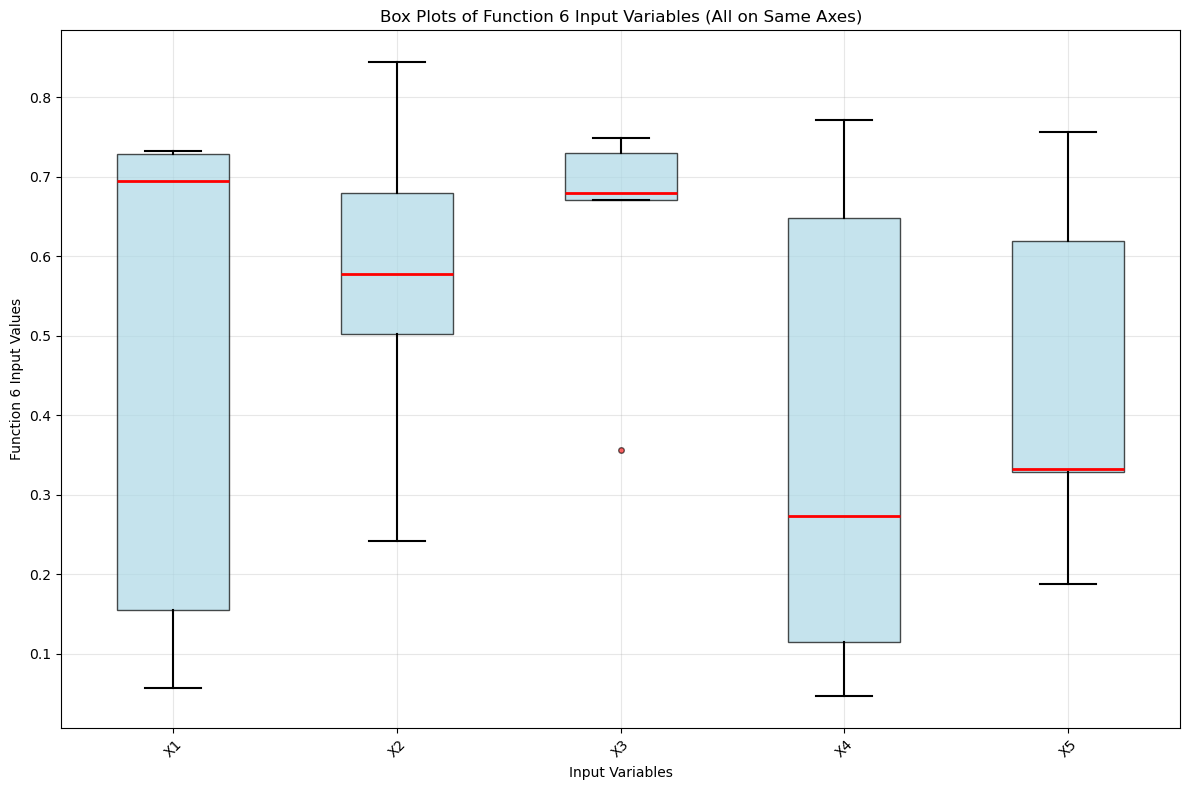

In [51]:
# Create a single plot with boxplots for all columns of x
plt.figure(figsize=(12, 8))

# Prepare data for boxplot - each column of x becomes a separate list
data_to_plot = [x_6[i] for i in range(5)]  

# Create boxplot with all columns on the same axes
box_plot = plt.boxplot(data_to_plot, 
                       labels=['X1', 'X2', 'X3', 'X4', 'X5'],
                       patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(color='black', linewidth=1.5),
                       capprops=dict(color='black', linewidth=1.5),
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))

plt.ylabel('Function 6 Input Values')
plt.xlabel('Input Variables')
plt.title('Box Plots of Function 6 Input Variables (All on Same Axes)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

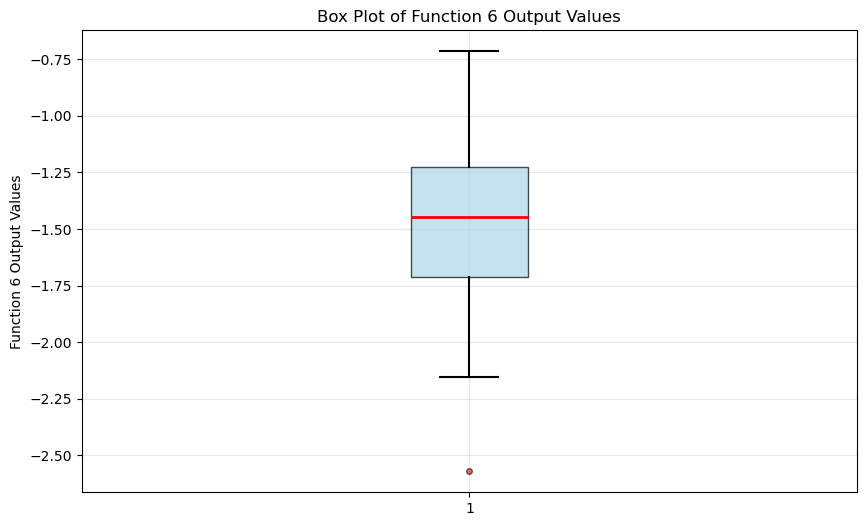

Function 6 Output Values Statistics:
Mean: -1.4953899396939465
Std: 0.44899959039781934
Min: -2.5711696316081234
Max: -0.7142649478202404
Range: 1.8569046837878829


In [35]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(y_6, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Function 6 Output Values')
plt.title('Box Plot of Function 6 Output Values')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Function 6 Output Values Statistics:")
print("Mean:", np.mean(y_6))
print("Std:", np.std(y_6))
print("Min:", np.min(y_6))
print("Max:", np.max(y_6))
print("Range:", np.max(y_6) - np.min(y_6))


The is not alot of information about the output, so I started with a simple RBF kernel which produced logical posterior mean values. 

I tried both the UBC and PI acquisition functions, and decided to choose the PI because it didn't get stuck on the boundaries of the domain. 

In [39]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = 0.1

# set up evaluation grid:
x_61 = np.linspace(0, 1, 30)
x_62 = np.linspace(0, 1, 30)
x_63 = np.linspace(0, 1, 30)
x_64 = np.linspace(0, 1, 30)
x_65 = np.linspace(0, 1, 30)
x_61, x_62, x_63, x_64, x_65 = np.meshgrid(x_61, x_62, x_63, x_64, x_65)
x_6_grid = np.column_stack([x_61.ravel(), x_62.ravel(), x_63.ravel(), x_64.ravel(), x_65.ravel()])

# Define and fit GP
kernel = RBF(length_scale = length_scale) 
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption) 
model.fit(np.array(x_6), np.array(y_6))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_6_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))

average posterior mean: -1.3325044433291715
average posterior standard deviation: 0.3062402233597737


In [42]:
# Calculate the UCB aquisition function
kappa = 0.01 
UCB = post_mean + kappa * post_std

# Calculate the PI aquisition function
eta = 0.001 # encourages improvement by at least eta
y_max = float(np.max(y_6))
z = (post_mean - y_max - eta) / (post_std + 1e-12)
PI = norm.cdf(z)

# Get the next query point
max_idx_6 = np.argmax(PI)  
next_point_6 = x_6_grid[max_idx_6] 
print("Best known point:", x_6[np.argmax(y_6)])
print("Next query point:", round(next_point_6[0], 6), round(next_point_6[1], 6), round(next_point_6[2], 6), round(next_point_6[3], 6), round(next_point_6[4], 6))


Best known point: [0.7281861  0.15469257 0.73255167 0.69399651 0.05640131]
Next query point: 0.517241 0.413793 0.275862 0.827586 0.241379


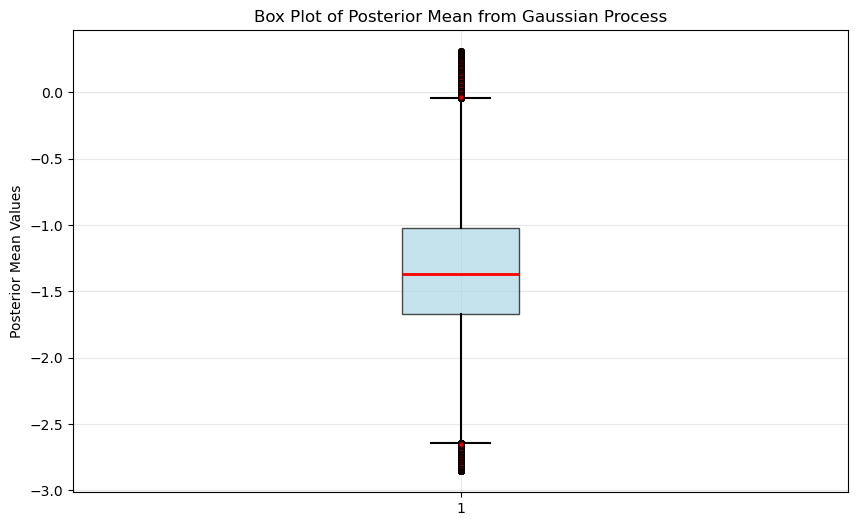

Posterior Mean Statistics:
Mean: -1.332504443329172
Std: 0.4976129275097272
Min: -2.8567511229132228
Max: 0.30967997116140517
Range: 3.166431094074628


In [37]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))


## Function 7:

A function with a 6D input and a 1D output.

*Application: You’re tasked with optimising an ML model by tuning six hyperparameters, for example learning rate, regularisation strength or number of hidden layers. The function you’re maximising is the model’s performance score (such as accuracy or F1), but since the relationship between inputs and output isn’t known, it’s treated as a black-box function.*

*Because this is a commonly used model, you might benefit from researching best practices or literature to guide your initial search space. Your goal is to find the combination of hyperparameters that yields the highest possible performance.*

/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_12274/3470689184.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_to_plot,


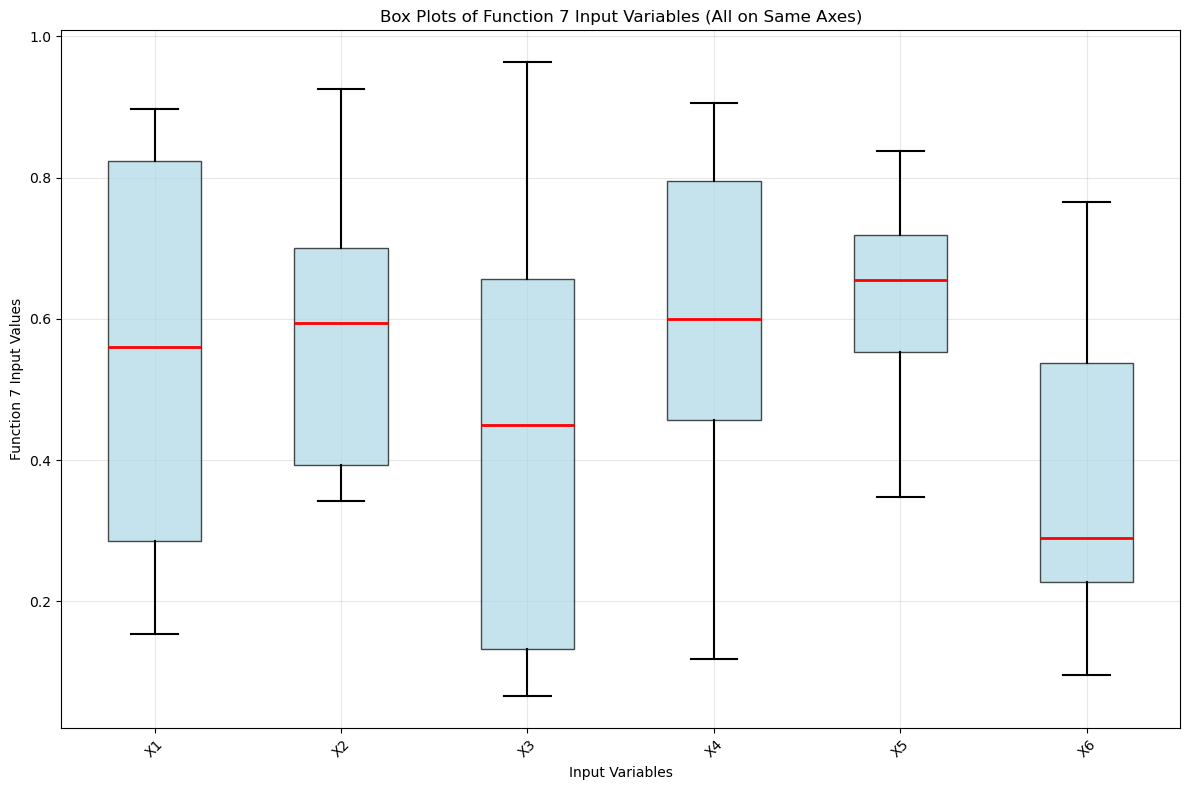

In [ ]:
# Create a single plot with boxplots for all columns of x_7
plt.figure(figsize=(12, 8))

# Prepare data for boxplot - each column of x_7 becomes a separate list
data_to_plot = [x_7[i] for i in range(6)]  # x_7[0] through x_7[5]

# Create boxplot with all columns on the same axes
box_plot = plt.boxplot(data_to_plot, 
                       labels=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'],
                       patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(color='black', linewidth=1.5),
                       capprops=dict(color='black', linewidth=1.5),
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))

plt.ylabel('Function 7 Input Values')
plt.xlabel('Input Variables')
plt.title('Box Plots of Function 7 Input Variables (All on Same Axes)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

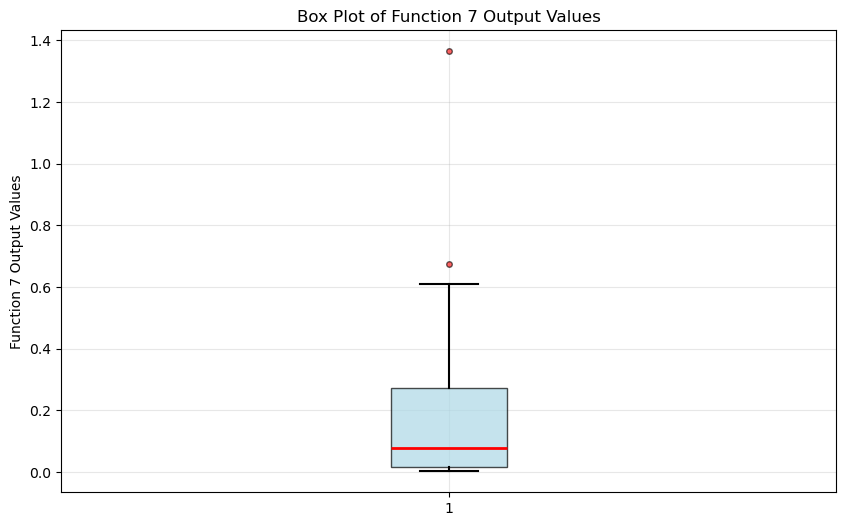

Function 7 Output Values Statistics:
Mean: 0.21960657602342604
Std: 0.3021294180712925
Min: 0.0027014650245082332
Max: 1.3649683044991994
Range: 1.362266839474691


In [52]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(y_7, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Function 7 Output Values')
plt.title('Box Plot of Function 7 Output Values')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Function 7 Output Values Statistics:")
print("Mean:", np.mean(y_7))
print("Std:", np.std(y_7))
print("Min:", np.min(y_7))
print("Max:", np.max(y_7))
print("Range:", np.max(y_7) - np.min(y_7))


Since very little is known about the type of function, and because most of the hyperparameters cover the full range from 0 to 1, I have decided not to restrict the boundaries of my grid further. One should also be cautious not to accidently exclude an optimal hyperparameter (source: https://neptune.ai/blog/how-to-optimize-hyperparameter-search).

I did have to reduce the number of unique parameter values I explored, because the grid was getting to large and my kernel kept crashing. 

Both UCB and PI acquisition functions gave very similar outputs that seemed to balance both exploration and exploitation. 

In [26]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = 0.1
nu = 1.5

# set up evaluation grid:
x_71 = np.linspace(0, 1, 15)
x_72 = np.linspace(0, 1, 15)
x_73 = np.linspace(0, 1, 15)
x_74 = np.linspace(0, 1, 15)
x_75 = np.linspace(0, 1, 15)
x_76 = np.linspace(0, 1, 15)
x_71, x_72, x_73, x_74, x_75, x_76 = np.meshgrid(x_71, x_72, x_73, x_74, x_75, x_76)
x_7_grid = np.column_stack([x_71.ravel(), x_72.ravel(), x_73.ravel(), x_74.ravel(), x_75.ravel(), x_76.ravel()])

# Define and fit GP
kernel = Matern(length_scale=length_scale, nu=nu) 
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption) 
model.fit(np.array(x_7), np.array(y_7))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_7_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))

average posterior mean: 0.2238227633877156
average posterior standard deviation: 0.3293784658782574


In [30]:
# Calculate the UCB aquisition function
kappa = 0.1 
UCB = post_mean + kappa * post_std

# Calculate the PI aquisition function
eta = 0.1 # encourages improvement by at least eta
y_max = float(np.max(y_7))
z = (post_mean - y_max - eta) / (post_std + 1e-12)
PI = norm.cdf(z)

# Get the next query point
max_idx_7 = np.argmax(PI)  
next_point_7 = x_7_grid[max_idx_7] 
print("Best known point:", x_7[np.argmax(y_7)])
print("Next query point:", round(next_point_7[0], 6), round(next_point_7[1], 6), round(next_point_7[2], 6), round(next_point_7[3], 6), round(next_point_7[4], 6), round(next_point_7[5], 6))

Best known point: [0.05789554 0.49167222 0.24742222 0.21811844 0.42042833 0.73096984]
Next query point: 0.0 0.428571 0.285714 0.142857 0.357143 0.785714


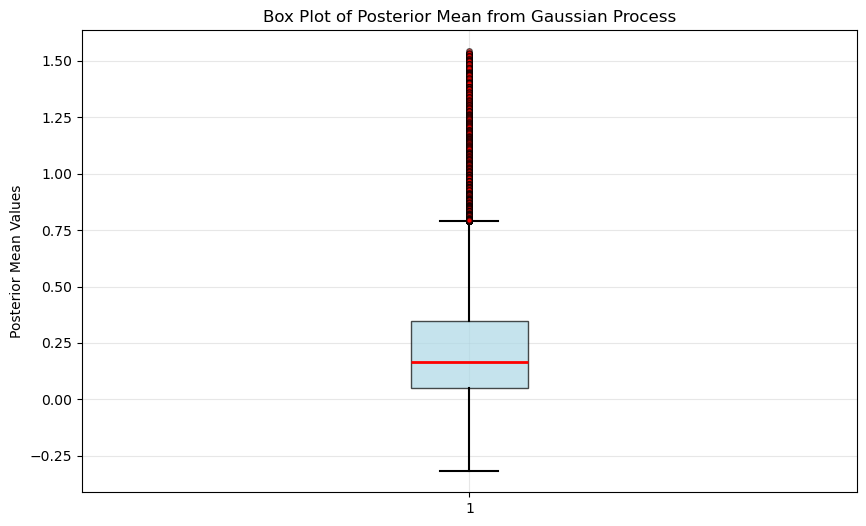

Posterior Mean Statistics:
Mean: 0.22382276338771606
Std: 0.24942554267499592
Min: -0.31878406835563744
Max: 1.5423142394723206
Range: 1.861098307827958


In [27]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))


## Function 8:

A function with a 8D input and a 1D output.

*Application: You’re optimising an eight-dimensional black-box function, where each of the eight input parameters affects the output, but the internal mechanics are unknown.*

*Your objective is to find the parameter combination that maximises the function’s output, such as performance, efficiency or validation accuracy. Because the function is high-dimensional and likely complex, global optimisation is hard, so identifying strong local maxima is often a practical strategy.*

*For example, imagine you’re tuning an ML model with eight hyperparameters: learning rate, batch size, number of layers, dropout rate, regularisation strength, activation function (numerically encoded), optimiser type (encoded) and initial weight range. Each input set returns a single validation accuracy score between 0 and 1. Your goal is to maximise this score.*

/var/folders/kk/8pfxp2vs1m3ch51n91qjgry40000gn/T/ipykernel_15769/1835682702.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_to_plot,


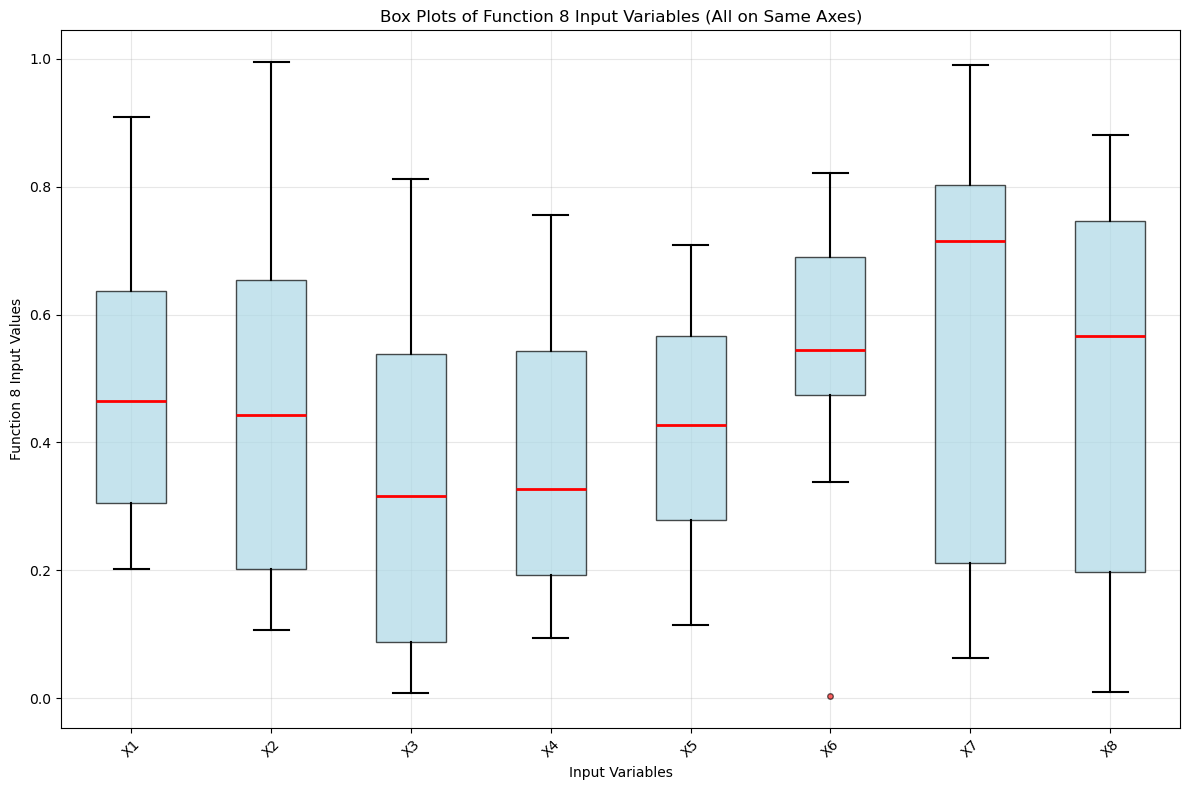

In [31]:
# Create a single plot with boxplots for all columns of x_8
plt.figure(figsize=(12, 8))

# Prepare data for boxplot - each column of x_8 becomes a separate list
data_to_plot = [x_8[i] for i in range(8)]  # x_8[0] through x_8[7]

# Create boxplot with all columns on the same axes
box_plot = plt.boxplot(data_to_plot, 
                       labels=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'],
                       patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(color='black', linewidth=1.5),
                       capprops=dict(color='black', linewidth=1.5),
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))

plt.ylabel('Function 8 Input Values')
plt.xlabel('Input Variables')
plt.title('Box Plots of Function 8 Input Variables (All on Same Axes)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


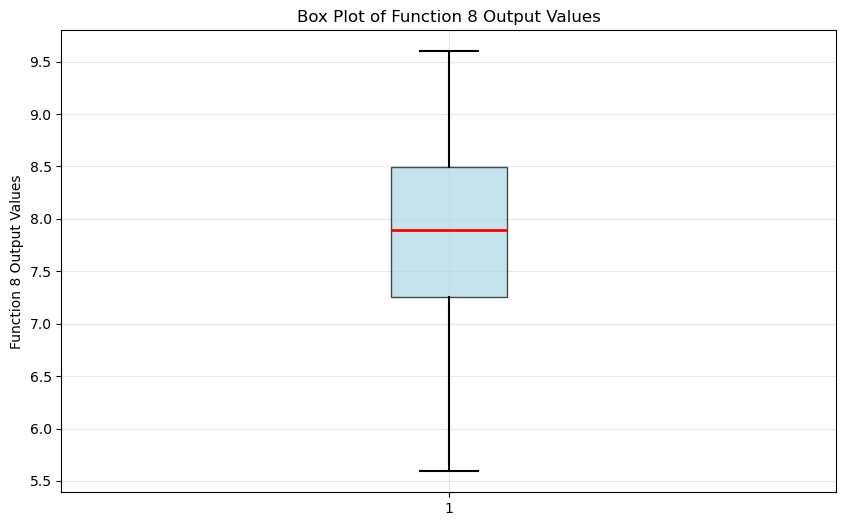

Function 8 Output Values Statistics:
Mean: 7.815274458164078
Std: 0.9469034630327874
Min: 5.5921933895401965
Max: 9.598482002566342
Range: 4.006288613026146


In [32]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(y_8, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Function 8 Output Values')
plt.title('Box Plot of Function 8 Output Values')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Function 8 Output Values Statistics:")
print("Mean:", np.mean(y_8))
print("Std:", np.std(y_8))
print("Min:", np.min(y_8))
print("Max:", np.max(y_8))
print("Range:", np.max(y_8) - np.min(y_8))


In [3]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = 0.1
nu = 1.5

# set up evaluation grid:
x_81 = np.linspace(0, 1, 5)
x_82 = np.linspace(0, 1, 5)
x_83 = np.linspace(0, 1, 5)
x_84 = np.linspace(0, 1, 5)
x_85 = np.linspace(0, 1, 5)
x_86 = np.linspace(0, 1, 5)
x_87 = np.linspace(0, 1, 5)
x_88 = np.linspace(0, 1, 5)
x_81, x_82, x_83, x_84, x_85, x_86, x_87, x_88 = np.meshgrid(x_81, x_82, x_83, x_84, x_85, x_86, x_87, x_88)
x_8_grid = np.column_stack([x_81.ravel(), x_82.ravel(), x_83.ravel(), x_84.ravel(), x_85.ravel(), x_86.ravel(), x_87.ravel(), x_88.ravel()])

# Define and fit GP
kernel = Matern(length_scale=length_scale, nu=nu) 
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption) 
model.fit(np.array(x_8), np.array(y_8))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_8_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))


average posterior mean: 7.4994401407800595
average posterior standard deviation: 0.27405609237172196


In [13]:
# Calculate the UCB aquisition function
kappa = 0.001
UCB = post_mean + kappa * post_std

# Calculate the PI aquisition function
eta = 0.01 # encourages improvement by at least eta
y_max = float(np.max(y_8))
z = (post_mean - y_max - eta) / (post_std + 1e-12)
PI = norm.cdf(z)

# Get the next query point
max_idx_8 = np.argmax(PI)  
next_point_8 = x_8_grid[max_idx_8] 
print("Best known point:", x_8[np.argmax(y_8)])
print("Next query point:", round(next_point_8[0], 6), round(next_point_8[1], 6), round(next_point_8[2], 6), round(next_point_8[3], 6), round(next_point_8[4], 6), round(next_point_8[5], 6), round(next_point_8[6], 6), round(next_point_8[7], 6))


Best known point: [0.05644741 0.06595555 0.02292868 0.03878647 0.40393544 0.80105533
 0.48830701 0.89308498]
Next query point: 0.25 0.25 0.0 0.25 0.5 0.5 0.25 0.5


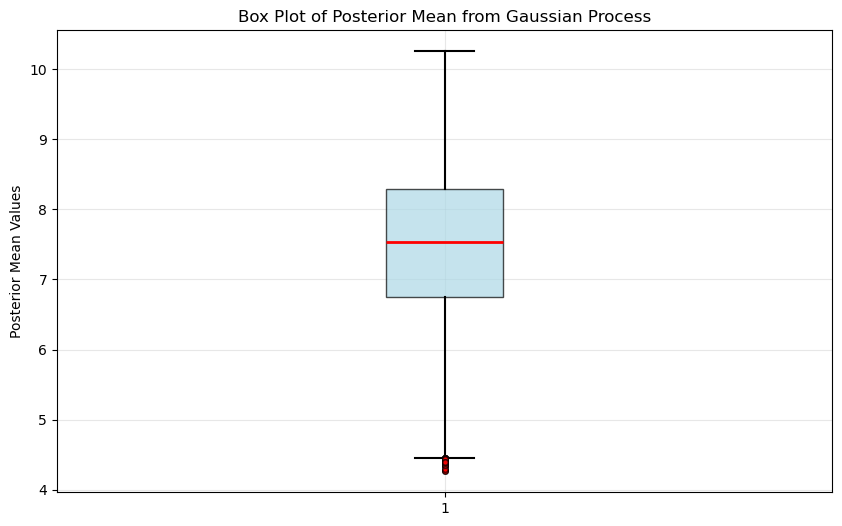

Posterior Mean Statistics:
Mean: 7.4994401407800595
Std: 1.0505293981436674
Min: 4.262326740971584
Max: 10.25742449913044
Range: 5.995097758158856


In [4]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))
